In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# EDA


In [2]:
data = pd.read_csv("credit_record.csv", index_col=0)
data

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C
...,...,...
5150487,-25,C
5150487,-26,C
5150487,-27,C


In [3]:
df = pd.read_csv("application_record.csv", index_col=0)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0


In [4]:
print(data.describe())
print(df.describe())

       MONTHS_BALANCE
count    1.048575e+06
mean    -1.913700e+01
std      1.402350e+01
min     -6.000000e+01
25%     -2.900000e+01
50%     -1.700000e+01
75%     -7.000000e+00
max      0.000000e+00
        CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  438557.000000      4.385570e+05  438557.000000  438557.000000   
mean        0.427390      1.875243e+05  -15997.904649   60563.675328   
std         0.724882      1.100869e+05    4185.030007  138767.799647   
min         0.000000      2.610000e+04  -25201.000000  -17531.000000   
25%         0.000000      1.215000e+05  -19483.000000   -3103.000000   
50%         0.000000      1.607805e+05  -15630.000000   -1467.000000   
75%         1.000000      2.250000e+05  -12514.000000    -371.000000   
max        19.000000      6.750000e+06   -7489.000000  365243.000000   

       FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count    438557.0    438557.000000  438557.000000  438557.000000   
mean          1.0

# Creating target

In [5]:
data.replace(('0','1','2','3','4','5'), (1,2,3,4,5,6), inplace=True)
data.replace(('X', 'C'), (0, -1), inplace=True)

In [6]:
status_avg = data.groupby('ID').mean()
status_avg = status_avg.drop(columns = 'MONTHS_BALANCE')
status_avg = status_avg.rename(columns = {'STATUS':'status_avg'})

std = data.groupby('ID')['STATUS'].std(ddof=0)
status_avg['std'] = std.tolist()

In [7]:
# data['mean'] = status_avg[i]['STATUS'] if status_avg[i]['ID']==data['ID']
data = pd.merge(data, status_avg, on='ID')
data

,MONTHS_BALANCE,STATUS,status_avg,std
ID,,,,
5001711,0,0,0.750000,0.433013
5001711,-1,1,0.750000,0.433013
5001711,-2,1,0.750000,0.433013
5001711,-3,1,0.750000,0.433013
5001712,0,-1,0.052632,0.998614
...,...,...,...,...
5150487,-25,-1,-1.000000,0.000000
5150487,-26,-1,-1.000000,0.000000
5150487,-27,-1,-1.000000,0.000000


# Feature Engineering

num(5):CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS

cat(12):
   no_need_tochange(4):FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
    replace(3):CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,
    one-hot-encoding(5):NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE


In [8]:
num = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS']
no_need_tochange = ['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
replace = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
get_dummies = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']


In [9]:
numeric_features = num+no_need_tochange
categorical_features = replace+get_dummies
cat=no_need_tochange+categorical_features

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

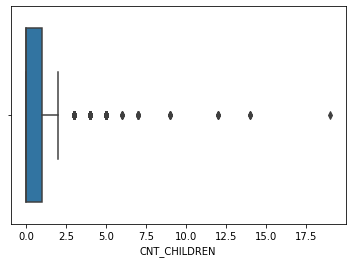

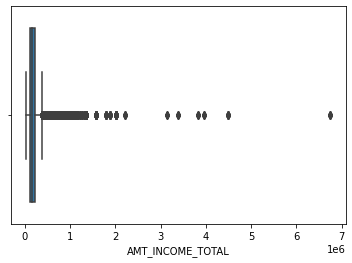

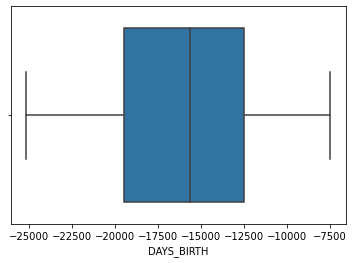

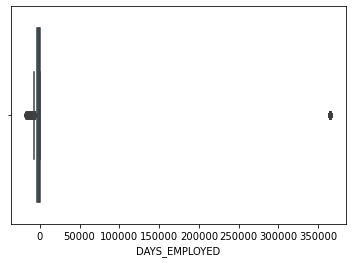

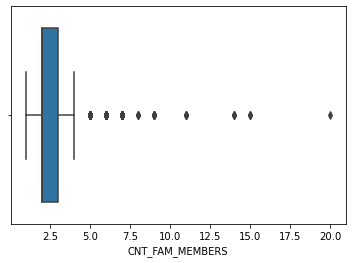

In [10]:
import seaborn as sns
for x in num:
    plt.figure()
    sns.boxplot(df[x])

In [11]:
for x in num:
    q_low = df[x].quantile(0.01)
    q_high = df[x].quantile(0.99)
    df = df[(df[x] >= q_low) & (df[x] <= q_high)]
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0


In [12]:
print(len(set(df.index)))
print(len(set(data.index)))
print(len(set(df.index).intersection(set(data.index))))

418174
45985
34589


In [13]:
df1 = pd.DataFrame.merge(status_avg, df, how ='inner', on = 'ID')
df1

,status_avg,std,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,,,
5008804,-0.625000,0.856957,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,-0.600000,0.879394,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,0.000000,0.683130,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,0.400000,0.489898,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,0.000000,0.000000,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0.333333,0.942809,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150483,0.000000,0.000000,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150484,0.846154,0.532939,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


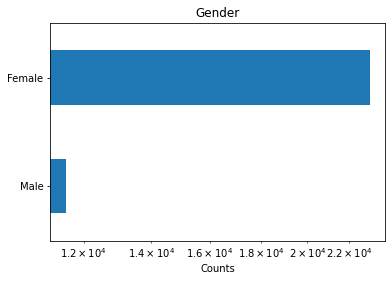

In [14]:
cat_map = {
    "M": "Male",
    "F": "Female"
}
cat_dtype = pd.CategoricalDtype(list(cat_map.values()), ordered=True)

ax = (
    df1["CODE_GENDER"]
    .map(cat_map)
    .astype(cat_dtype)
    .value_counts()
    .sort_index()
    .plot(kind="barh")
)
ax.semilogx()
ax.set_xlabel("Counts")
ax.set_title("Gender")
None

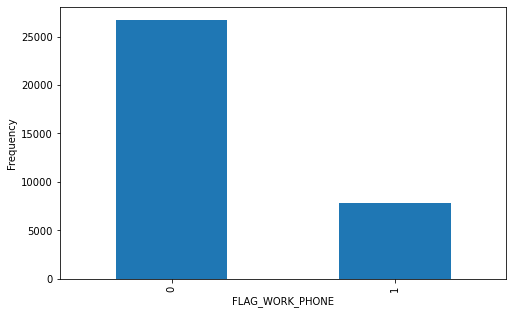

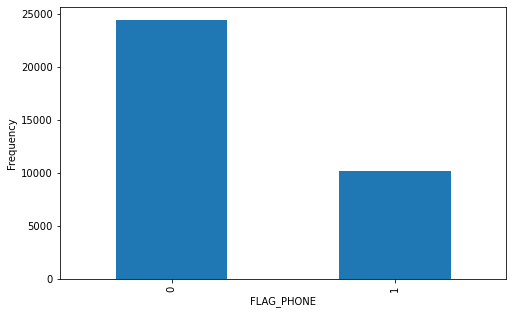

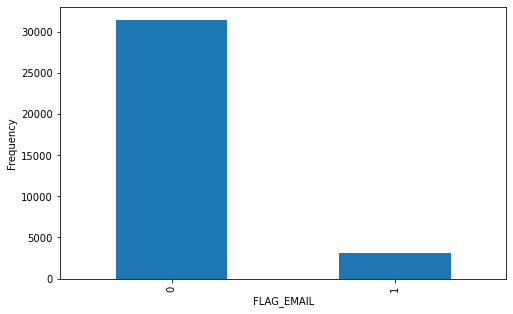

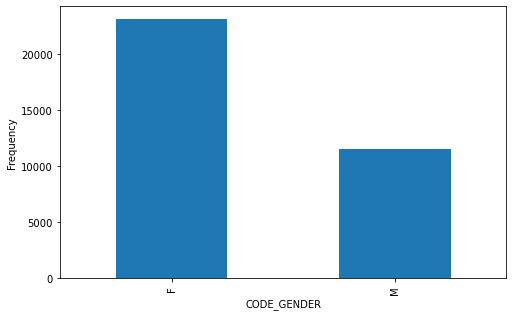

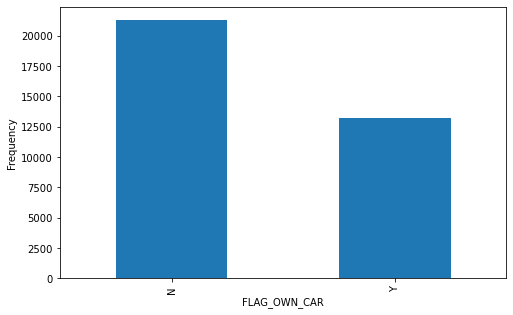

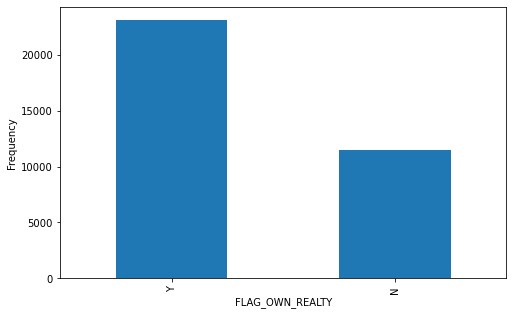

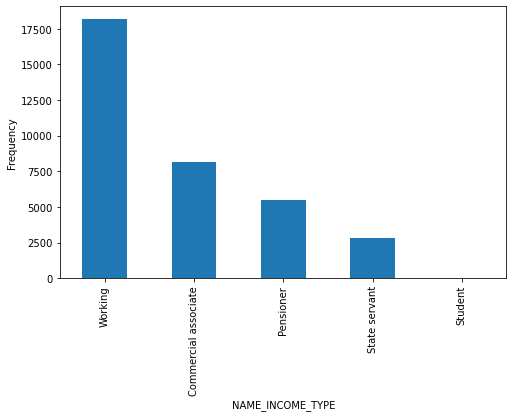

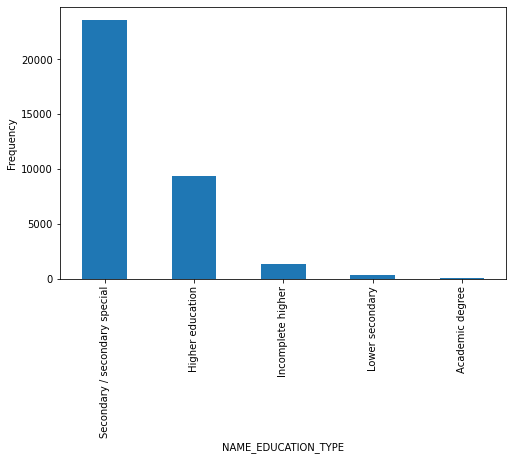

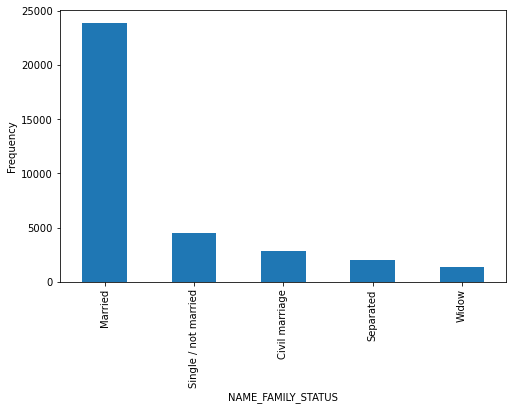

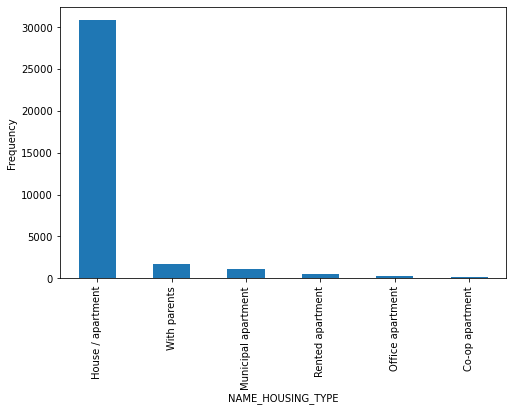

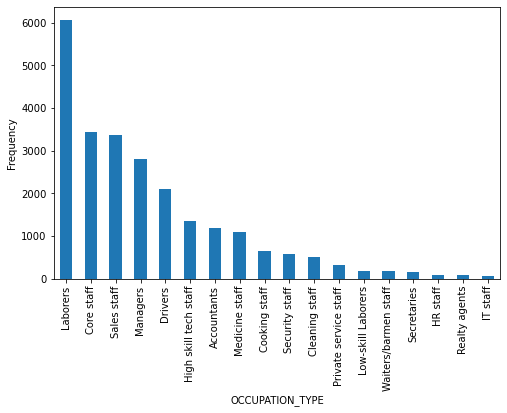

In [15]:
for x in cat:
    plt.figure()
    ax = df1[x].value_counts().plot(kind='bar',
                                    figsize=(8,5))
    ax.set_xlabel(x)
    ax.set_ylabel("Frequency")

In [16]:
df1=df1.drop(columns='FLAG_MOBIL')
df1

,status_avg,std,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,,
5008804,-0.625000,0.856957,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
5008805,-0.600000,0.879394,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
5008806,0.000000,0.683130,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
5008808,0.400000,0.489898,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
5008809,0.000000,0.000000,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0.333333,0.942809,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0
5150483,0.000000,0.000000,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0
5150484,0.846154,0.532939,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,0,0,0,Core staff,3.0


# Classification Model

## Logistic Regression

In [17]:
data['target'] = np.where(data['status_avg']<=0, 1, 0)
data

,MONTHS_BALANCE,STATUS,status_avg,std,target
ID,,,,,
5001711,0,0,0.750000,0.433013,0
5001711,-1,1,0.750000,0.433013,0
5001711,-2,1,0.750000,0.433013,0
5001711,-3,1,0.750000,0.433013,0
5001712,0,-1,0.052632,0.998614,0
...,...,...,...,...,...
5150487,-25,-1,-1.000000,0.000000,1
5150487,-26,-1,-1.000000,0.000000,1
5150487,-27,-1,-1.000000,0.000000,1


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

clf = Pipeline([
     ('preprocessor', preprocessor),
     ('clf', LinearRegression())
])

In [31]:
clf1 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', LogisticRegression())
])

df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
X=df2[numeric_features+categorical_features]
y=df2['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
            test_size=0.3, 
            random_state=66)

model =clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.52      0.01      0.01     87350
           1       0.61      1.00      0.75    134692

    accuracy                           0.61    222042
   macro avg       0.56      0.50      0.38    222042
weighted avg       0.57      0.61      0.46    222042

              precision    recall  f1-score   support

           0       0.48      0.01      0.01    203924
           1       0.61      1.00      0.75    314174

    accuracy                           0.61    518098
   macro avg       0.54      0.50      0.38    518098
weighted avg       0.56      0.61      0.46    518098



In [32]:
df2.corr()

,MONTHS_BALANCE,STATUS,status_avg,std,target,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
MONTHS_BALANCE,1.000000,-0.169071,0.134354,-0.067165,-0.105095,-0.000597,-0.000075,0.028767,-0.000940,NaN,-0.000057,-0.004376,0.002013,-0.007653
STATUS,-0.169071,1.000000,0.679692,-0.152887,-0.568099,0.000159,0.022154,-0.005017,0.000710,NaN,-0.003089,0.015315,0.006015,-0.000652
status_avg,0.134354,0.679692,1.000000,-0.224936,-0.835818,0.000234,0.032594,-0.007381,0.001044,NaN,-0.004544,0.022533,0.008850,-0.000959
std,-0.067165,-0.152887,-0.224936,1.000000,0.175970,-0.000161,-0.031823,-0.003976,0.008641,NaN,-0.000959,-0.008696,-0.006779,-0.000708
target,-0.105095,-0.568099,-0.835818,0.175970,1.000000,0.004578,-0.029192,0.008155,-0.000214,NaN,0.006785,-0.014240,-0.013999,0.007581
CNT_CHILDREN,-0.000597,0.000159,0.000234,-0.000161,0.004578,1.000000,0.032484,0.368097,-0.229947,NaN,0.043205,-0.014527,0.019792,0.886645
AMT_INCOME_TOTAL,-0.000075,0.022154,0.032594,-0.031823,-0.029192,0.032484,1.000000,0.081822,-0.170112,NaN,-0.032109,0.013289,0.077479,0.027078
DAYS_BIRTH,0.028767,-0.005017,-0.007381,-0.003976,0.008155,0.368097,0.081822,1.000000,-0.594690,NaN,0.175290,-0.022850,0.095662,0.330390
DAYS_EMPLOYED,-0.000940,0.000710,0.001044,0.008641,-0.000214,-0.229947,-0.170112,-0.594690,1.000000,NaN,-0.234304,-0.010707,-0.073490,-0.224421
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


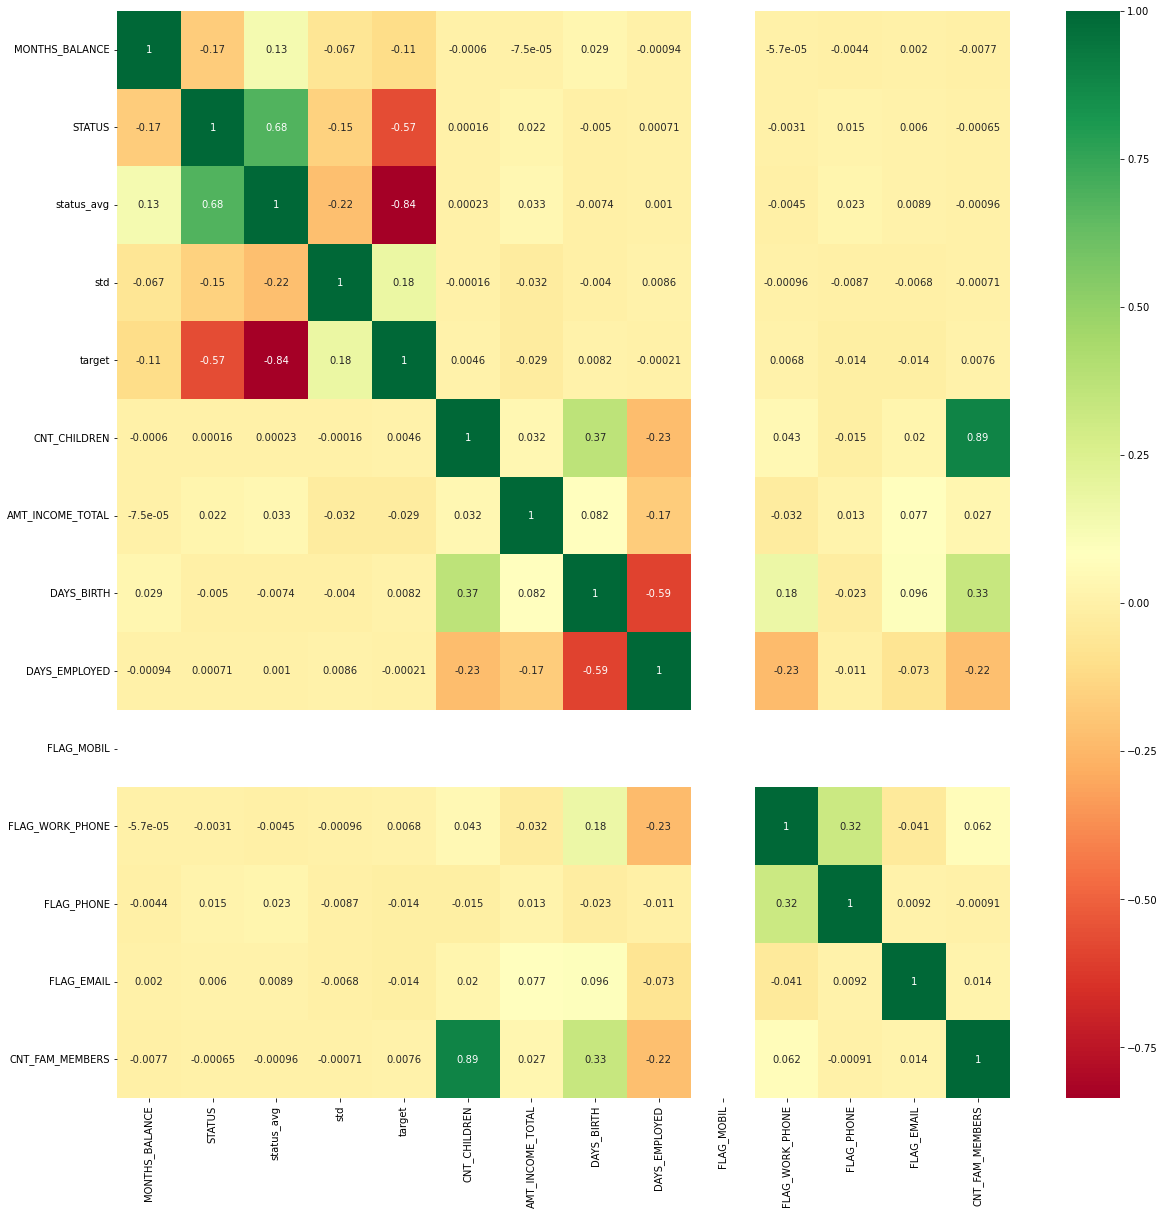

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
corrmat.index
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
df_f = df2[df2['CODE_GENDER'] == 'F']
df_m = df2[df2['CODE_GENDER'] == 'M']

### For Female with stratify

In [35]:
clf1 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', LogisticRegression())
])

# df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
X=df_f[numeric_features+categorical_features]
y=df_f['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.48      0.01      0.01     57635
           1       0.61      1.00      0.76     89578

    accuracy                           0.61    147213
   macro avg       0.54      0.50      0.38    147213
weighted avg       0.56      0.61      0.46    147213

              precision    recall  f1-score   support

           0       0.48      0.01      0.01    134480
           1       0.61      1.00      0.76    209014

    accuracy                           0.61    343494
   macro avg       0.54      0.50      0.38    343494
weighted avg       0.56      0.61      0.46    343494



### For Male with stratify

In [36]:
clf1 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', LogisticRegression())
])

# df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
X=df_m[numeric_features+categorical_features]
y=df_m['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.56      0.04      0.07     29748
           1       0.61      0.98      0.75     45082

    accuracy                           0.61     74830
   macro avg       0.58      0.51      0.41     74830
weighted avg       0.59      0.61      0.48     74830

              precision    recall  f1-score   support

           0       0.56      0.04      0.08     69411
           1       0.61      0.98      0.75    105192

    accuracy                           0.61    174603
   macro avg       0.58      0.51      0.41    174603
weighted avg       0.59      0.61      0.48    174603



### For Female without stratify

In [37]:
clf1 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', LogisticRegression())
])

# df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
X=df_f[numeric_features+categorical_features]
y=df_f['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
#             stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.48      0.00      0.01     57896
           1       0.61      1.00      0.75     89317

    accuracy                           0.61    147213
   macro avg       0.54      0.50      0.38    147213
weighted avg       0.56      0.61      0.46    147213

              precision    recall  f1-score   support

           0       0.46      0.00      0.01    134219
           1       0.61      1.00      0.76    209275

    accuracy                           0.61    343494
   macro avg       0.53      0.50      0.38    343494
weighted avg       0.55      0.61      0.46    343494



### For Male without stratify

In [38]:
clf1 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', LogisticRegression())
])

# df2 = pd.DataFrame.merge(data, df, how ='inner', on = 'ID')
X=df_m[numeric_features+categorical_features]
y=df_m['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
#             stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf1.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

/Users/yunzhugu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.57      0.04      0.08     29942
           1       0.60      0.98      0.75     44888

    accuracy                           0.60     74830
   macro avg       0.59      0.51      0.41     74830
weighted avg       0.59      0.60      0.48     74830

              precision    recall  f1-score   support

           0       0.56      0.04      0.07     69217
           1       0.61      0.98      0.75    105386

    accuracy                           0.61    174603
   macro avg       0.59      0.51      0.41    174603
weighted avg       0.59      0.61      0.48    174603



## RandomForest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df2[numeric_features+categorical_features]
y=df2['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
#             stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     87350
           1       0.82      0.89      0.85    134692

    accuracy                           0.82    222042
   macro avg       0.81      0.80      0.80    222042
weighted avg       0.82      0.82      0.81    222042

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    203924
           1       0.82      0.89      0.86    314174

    accuracy                           0.82    518098
   macro avg       0.82      0.80      0.81    518098
weighted avg       0.82      0.82      0.82    518098



### Oversample for 0

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df2[numeric_features+categorical_features]
y=df2['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
#             stratify = y,
            test_size=0.3, 
            random_state=66)

X = pd.concat([X_train, y_train], axis = 1)
not_approve = X[X.target==0]
approve = X[X.target==1]

approve_upsampled = resample(approve,
                            replace = True,
                            n_samples = len(not_approve),
                            random_state = 66)
upsampled = pd.concat([not_approve, approve_upsampled])
upsampled.target.value_counts()

X_train = upsampled.drop('target', axis = 1)
y_train = upsampled.target

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     87350
           1       0.86      0.81      0.83    134692

    accuracy                           0.80    222042
   macro avg       0.79      0.80      0.80    222042
weighted avg       0.81      0.80      0.81    222042

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    203924
           1       0.80      0.82      0.81    203924

    accuracy                           0.81    407848
   macro avg       0.81      0.81      0.81    407848
weighted avg       0.81      0.81      0.81    407848



### For Female with stratify

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df_f[numeric_features+categorical_features]
y=df_f['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
            stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     57635
           1       0.82      0.89      0.86     89578

    accuracy                           0.82    147213
   macro avg       0.82      0.80      0.80    147213
weighted avg       0.82      0.82      0.81    147213

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    134480
           1       0.82      0.90      0.86    209014

    accuracy                           0.82    343494
   macro avg       0.82      0.80      0.81    343494
weighted avg       0.82      0.82      0.82    343494



### For Female without stratify

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df_f[numeric_features+categorical_features]
y=df_f['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
#             stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     57896
           1       0.82      0.89      0.86     89317

    accuracy                           0.82    147213
   macro avg       0.82      0.80      0.80    147213
weighted avg       0.82      0.82      0.81    147213

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    134219
           1       0.82      0.90      0.86    209275

    accuracy                           0.82    343494
   macro avg       0.82      0.80      0.81    343494
weighted avg       0.82      0.82      0.82    343494



### For Male with Stratify

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df_m[numeric_features+categorical_features]
y=df_m['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
            stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     29748
           1       0.82      0.89      0.85     45082

    accuracy                           0.81     74830
   macro avg       0.81      0.79      0.80     74830
weighted avg       0.81      0.81      0.81     74830

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     69411
           1       0.82      0.89      0.85    105192

    accuracy                           0.82    174603
   macro avg       0.82      0.80      0.80    174603
weighted avg       0.82      0.82      0.81    174603



###  For Male without Stratify

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df_m[numeric_features+categorical_features]
y=df_m['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
#             stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     29942
           1       0.82      0.88      0.85     44888

    accuracy                           0.81     74830
   macro avg       0.81      0.79      0.80     74830
weighted avg       0.81      0.81      0.81     74830

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     69217
           1       0.82      0.89      0.85    105386

    accuracy                           0.82    174603
   macro avg       0.81      0.80      0.80    174603
weighted avg       0.82      0.82      0.82    174603



### RandomForestClassifer with Stratify on Whole Dataset

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df2[numeric_features+categorical_features]
y=df2['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
            stratify = y,
            test_size=0.3, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     87382
           1       0.82      0.89      0.85    134660

    accuracy                           0.82    222042
   macro avg       0.81      0.80      0.80    222042
weighted avg       0.81      0.82      0.81    222042

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    203892
           1       0.82      0.90      0.86    314206

    accuracy                           0.82    518098
   macro avg       0.82      0.80      0.81    518098
weighted avg       0.82      0.82      0.82    518098



[[<AxesSubplot:title={'center':'0'}>]]


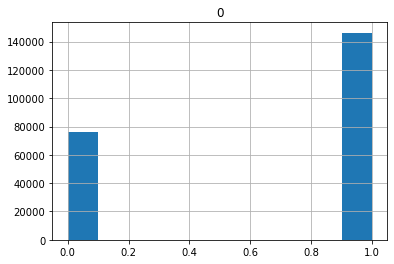

In [46]:
y_predict_df=pd.DataFrame(y_predict)
print(y_predict_df.hist())

# Robustness test
### Using RandomForestClassifier without GridSearch

## -change test_size 

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf2 = Pipeline([
     ('preprocessor', preprocessor),
     ('clf1', RandomForestClassifier())
])


X=df2[numeric_features+categorical_features]
y=df2['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y,
            stratify = y,
            test_size=0.25, 
            random_state=66)

model =clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_train_predict=model.predict(X_train)
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75     72819
           1       0.82      0.89      0.85    112216

    accuracy                           0.82    185035
   macro avg       0.81      0.80      0.80    185035
weighted avg       0.81      0.82      0.81    185035

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    218455
           1       0.82      0.90      0.86    336650

    accuracy                           0.82    555105
   macro avg       0.82      0.80      0.81    555105
weighted avg       0.82      0.82      0.82    555105



## -change inputs

In [48]:
Robust_test = pd.DataFrame()
Robust_test['y_test'] = pd.DataFrame(y_test.head())
y_predict_df = pd.DataFrame(y_predict)
# Robust_test['origin_pred'] = y_predict_df
Robust_test.insert(1, 'origin_pred', y_predict_df.head())

In [49]:
X_test_head = X_test.head()
X_test_head['AMT_INCOME_TOTAL'] = X_test_head['AMT_INCOME_TOTAL'] * 0.99
X_test_head

/var/folders/ch/bk2j1gdn7lq4vf941t37hg0r0000gn/T/ipykernel_20704/1775573699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_head['AMT_INCOME_TOTAL'] = X_test_head['AMT_INCOME_TOTAL'] * 0.99


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
ID,,,,,,,,,,,,,,,,
5137355,0,133650.0,-17452,-3913,2.0,1,1,0,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,Drivers
5114551,1,133650.0,-17121,-9751,2.0,0,0,0,F,N,Y,Commercial associate,Secondary / secondary special,Widow,Municipal apartment,Core staff
5092264,0,111375.0,-17837,-351,2.0,0,0,0,M,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Security staff
5028696,1,178200.0,-18349,-7205,2.0,0,0,0,F,Y,Y,Commercial associate,Higher education,Separated,House / apartment,Core staff
5024957,2,171517.5,-13219,-5542,3.0,0,0,0,F,N,Y,Working,Secondary / secondary special,Separated,House / apartment,Core staff


In [50]:
y_predict_head=model.predict(X_test_head)
print(classification_report(y_test.head(),y_predict_head))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [51]:
Robust_test.insert(2, 'new_pred', y_predict_head)
Robust_test

,y_test,origin_pred,new_pred
ID,,,
5137355,1,1,1
5114551,0,0,0
5092264,1,1,1
5028696,0,0,0
5024957,0,0,0


In [52]:
X_test_first = X_test.head(10)
X_test_first

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
ID,,,,,,,,,,,,,,,,
5137355,0,135000.0,-17452,-3913,2.0,1,1,0,M,Y,N,Working,Secondary / secondary special,Married,House / apartment,Drivers
5114551,1,135000.0,-17121,-9751,2.0,0,0,0,F,N,Y,Commercial associate,Secondary / secondary special,Widow,Municipal apartment,Core staff
5092264,0,112500.0,-17837,-351,2.0,0,0,0,M,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Security staff
5028696,1,180000.0,-18349,-7205,2.0,0,0,0,F,Y,Y,Commercial associate,Higher education,Separated,House / apartment,Core staff
5024957,2,173250.0,-13219,-5542,3.0,0,0,0,F,N,Y,Working,Secondary / secondary special,Separated,House / apartment,Core staff
5056071,0,157500.0,-14065,-786,2.0,1,0,0,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
5136979,0,306000.0,-12677,-5587,2.0,0,0,0,F,N,N,State servant,Higher education,Married,House / apartment,Medicine staff
5056164,0,216000.0,-18067,-6517,2.0,1,1,1,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,High skill tech staff
5050791,0,180000.0,-10294,-1992,1.0,0,0,0,M,N,N,State servant,Secondary / secondary special,Single / not married,House / apartment,Laborers


In [53]:
_x = '10000'

In [54]:
X_test_first['AMT_INCOME_TOTAL'] = _x
X_test_first
# val = latest_model.predict([[float(_x)]])
val = model.predict(X_test_first)
val

/var/folders/ch/bk2j1gdn7lq4vf941t37hg0r0000gn/T/ipykernel_20704/3636101731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_first['AMT_INCOME_TOTAL'] = _x


array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [55]:
example = pd.DataFrame()
example['CNT_CHILDREN'] = [1]
example['AMT_INCOME_TOTAL'] = 200000.0
example['DAYS_BIRTH'] = -10000
example['DAYS_EMPLOYED'] = -3000
example['CNT_FAM_MEMBERS'] = 2.0
example['FLAG_WORK_PHONE'] = 0
example['FLAG_PHONE'] = 0
example['FLAG_EMAIL'] = 0
example['CODE_GENDER'] = 'F'
example['FLAG_OWN_CAR'] = 'N'
example['FLAG_OWN_REALTY'] = 'N'
example['NAME_INCOME_TYPE'] = 'Commercial associate'
example['NAME_EDUCATION_TYPE'] = 'Secondary / secondary special'
example['NAME_FAMILY_STATUS'] = 'Seperated'
example['NAME_HOUSING_TYPE'] = 'Municipal apartment'
example['OCCUPATION_TYPE'] = 'Laborers'
example

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,1,200000.0,-10000,-3000,2.0,0,0,0,F,N,N,Commercial associate,Secondary / secondary special,Seperated,Municipal apartment,Laborers


In [56]:
val = model.predict(example)
val

array([1])

# Regression Model

In [57]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')),
# ])
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler()),
# ])
# from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ]
# )
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression

# clf = Pipeline([
#      ('preprocessor', preprocessor),
#      ('clf', LinearRegression())
# ])

In [58]:
X=df1[numeric_features+categorical_features]
y=df1[['status_avg','std']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            test_size=0.25, 
            random_state=66)

model1 =clf.fit(X_train, y_train['status_avg'])
model2 =clf.fit(X_train, y_train['std'])

from sklearn import metrics
y_predict1 = model1.predict(X_test)
r2_score1 = metrics.r2_score(y_test['status_avg'], y_predict1)
print("R2 score of average:",r2_score1)

y_predict2 = model2.predict(X_test)
r2_score2 = metrics.r2_score(y_test['std'], y_predict2)
print("R2 score of std:",r2_score2)

mse1=metrics.mean_squared_error(y_test['status_avg'], y_predict1)
mse2=metrics.mean_squared_error(y_test['std'], y_predict2)

print('MSE1:',mse1)
print('MSE2:',mse2)


# confusionmatrix = metrics.confusion_matrix(y_test, y_predict)
# target_names = ['class 0', 'class 1']
# classifyreport = metrics.classification_report(y_test, y_predict,target_names=target_names)
# print('accuracy ',accuracy) 
# print('confusion matrix n', confusionmatrix)
# print('classify report n', classifyreport)

R2 score of average: -0.25130039009135885
R2 score of std: 0.001712210518184487
MSE1: 0.5336337542039855
MSE2: 0.138775599018413


In [59]:
X_test.insert(0,'avg predict',y_predict1)

In [60]:
test= pd.DataFrame.merge(X_test, y_test, how ='inner', on = 'ID')
test

,avg predict,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,status_avg,std
ID,,,,,,,,,,,,,,,,,,,
5065395,0.517334,0,396000.0,-12574,-2453,2.0,1,1,0,M,Y,N,Commercial associate,Higher education,Married,House / apartment,Managers,0.000000,0.000000
5150033,0.528320,3,112500.0,-9749,-1356,5.0,1,0,0,F,Y,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Cleaning staff,0.800000,0.400000
5100289,0.516357,0,193500.0,-14140,-1039,2.0,0,0,0,F,Y,Y,Working,Higher education,Married,House / apartment,NaN,0.969697,0.171420
5066643,0.501465,0,315000.0,-19180,-1223,2.0,1,1,0,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,NaN,-0.640000,0.768375
5126509,0.563599,0,112500.0,-19087,-5828,1.0,1,1,0,F,N,N,State servant,Secondary / secondary special,Single / not married,House / apartment,Security staff,1.600000,0.489898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142406,0.510742,0,185400.0,-23584,365243,1.0,0,0,0,F,Y,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,-0.769231,0.638971
5041203,0.546997,0,180000.0,-23035,-2134,1.0,0,0,0,F,N,Y,Working,Higher education,Widow,House / apartment,Secretaries,1.000000,0.000000
5067301,0.519531,1,103500.0,-10024,-1663,3.0,0,0,1,F,Y,Y,Working,Higher education,Married,House / apartment,Sales staff,0.000000,0.000000


In [61]:
X_test

,avg predict,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
ID,,,,,,,,,,,,,,,,,
5065395,0.517334,0,396000.0,-12574,-2453,2.0,1,1,0,M,Y,N,Commercial associate,Higher education,Married,House / apartment,Managers
5150033,0.528320,3,112500.0,-9749,-1356,5.0,1,0,0,F,Y,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,Cleaning staff
5100289,0.516357,0,193500.0,-14140,-1039,2.0,0,0,0,F,Y,Y,Working,Higher education,Married,House / apartment,NaN
5066643,0.501465,0,315000.0,-19180,-1223,2.0,1,1,0,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,NaN
5126509,0.563599,0,112500.0,-19087,-5828,1.0,1,1,0,F,N,N,State servant,Secondary / secondary special,Single / not married,House / apartment,Security staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142406,0.510742,0,185400.0,-23584,365243,1.0,0,0,0,F,Y,Y,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN
5041203,0.546997,0,180000.0,-23035,-2134,1.0,0,0,0,F,N,Y,Working,Higher education,Widow,House / apartment,Secretaries
5067301,0.519531,1,103500.0,-10024,-1663,3.0,0,0,1,F,Y,Y,Working,Higher education,Married,House / apartment,Sales staff


In [62]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
clf_f = Pipeline([
     ('preprocessor', preprocessor),
     ('clf_f', forest)
])
model1_f =clf_f.fit(X_train, y_train['status_avg'])
model2_f =clf_f.fit(X_train, y_train['std'])


y_predict1_f = model1_f.predict(X_test)
r2_score1_f = metrics.r2_score(y_test['status_avg'], y_predict1_f)
print("R2 score of average:",r2_score1_f)

y_predict2_f = model2_f.predict(X_test)
r2_score2_f = metrics.r2_score(y_test['std'], y_predict2_f)
print("R2 score of std:",r2_score2_f)

mse1_f=metrics.mean_squared_error(y_test['status_avg'], y_predict1_f)
mse2_f=metrics.mean_squared_error(y_test['std'], y_predict2_f)

print('MSE1:',mse1_f)
print('MSE2:',mse2_f)

R2 score of average: -0.44241349405511876
R2 score of std: 0.03942201441488913
MSE1: 0.6151364884421742
MSE2: 0.1335334226843235
